In [1]:
from google.colab import files
uploaded = files.upload()

Saving eye movement.csv to eye movement.csv


In [0]:
import pandas as pd    # for dataframe
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for splitiing data frame into testa and train dataframe
from sklearn.neighbors import KNeighborsClassifier   # To use KNN model
from sklearn.metrics import confusion_matrix          # To get confusion matrix
from sklearn.metrics import classification_report     # To get accuracy, precision, F score and all
from sklearn.metrics import accuracy_score
import sklearn.metrics as met
from numpy import array   
import io
import numpy as np
import seaborn as sn


In [3]:
# Uploading data using pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['eye movement.csv']))
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,"eyeDetection{0,1}"
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0.0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0


In [0]:
# Splitting dataset into two data frames X and Y
values = data.values
X = values[:,:-1]
Y = values[:, -1] 

In [0]:
# splitting dataset
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.1, shuffle = False, random_state = 1)

In [0]:
# walk-forward validation
NewX = [i for i in train_X]
NewY = [j for j in train_Y]

In [0]:
pred = list()

for i in range(len(test_Y)):
  KNN = KNeighborsClassifier(n_neighbors=3)
  # fit model on subset of data
  subX = array(NewX)[-10:,:]
  subY = array(NewY)[-10:]
  KNN.fit(subX, subY)

  # Now forcasting for next step
  Ynew = KNN.predict([test_X[i,:]])[0]

  # storing prediction in pred list
  pred.append(Ynew)

  NewX.append(test_X[i, :])
  NewY.append(test_Y[i])

In [11]:
# evaluate prediction
print(accuracy_score(test_Y, pred))

0.992656875834446


[[1401    4]
 [   7   86]]


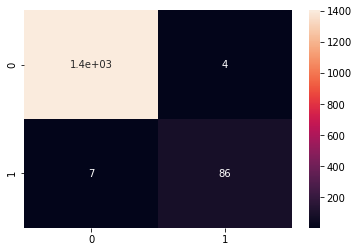

In [9]:
cm = confusion_matrix(test_Y, pred)
print(cm)
sn.heatmap(cm, annot=True)
plt.show()

In [10]:
print(classification_report(test_Y, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1405
         1.0       0.96      0.92      0.94        93

    accuracy                           0.99      1498
   macro avg       0.98      0.96      0.97      1498
weighted avg       0.99      0.99      0.99      1498



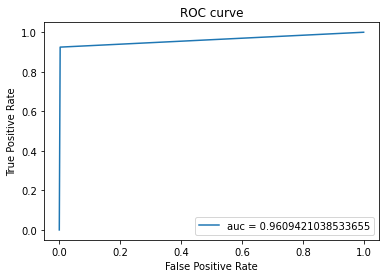

In [38]:
prob_Y = KNN.predict_proba(test_X)
#print(prob_Y)
preds = prob_Y[:1]

fpr, tpr, threshold = met.roc_curve(test_Y, pred)
#print(fpr, tpr, threshold)
# plot ROC curve
plt.title("ROC curve")
plt.plot(fpr, tpr, label ="auc = " + str(auc))
plt.legend(loc = 4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc = met.auc(fpr, tpr)
#print(auc)
